**ITSs rarefaction**

In [2]:
#  import libs
import numpy as np
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from pandas import read_csv, DataFrame
from tqdm import tqdm
from subprocess import call
from Bio.SeqIO import parse
from skbio.stats.composition import clr 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

**pool mode here**  
**change for single mode files if necessary**  
**ITS full [:-1]**

In [3]:
ITS_full_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_5.8_ITS2_OTU_rarefactn_count_long_table.csv', sep ='\t')
ITS_full_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_5.8_ITS2_Genus_rarefactn_count_long_table.csv', sep ='\t')
ITS_full_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_5.8_ITS2_Species_rarefactn_count_long_table.csv', sep ='\t')
ITS1_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_OTU_rarefactn_count_long_table.csv', sep = '\t',)
ITS1_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_Genus_rarefactn_count_long_table.csv', sep = '\t',)
ITS1_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS1_Species_rarefactn_count_long_table.csv', sep = '\t',)
ITS2_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS2_OTU_rarefactn_count_long_table.csv', sep = '\t')
ITS2_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS2_Genus_rarefactn_count_long_table.csv', sep = '\t',)
ITS2_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/ITS_new_db_single/single_ITS2_Species_rarefactn_count_long_table.csv', sep = '\t',)

In [3]:
ITS_full_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_5.8_ITS2_OTU_rarefactn_count_long_table.csv', sep ='\t')
ITS_full_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_5.8_ITS2_Genus_rarefactn_count_long_table.csv', sep ='\t')
ITS_full_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_5.8_ITS2_Species_rarefactn_count_long_table.csv', sep ='\t')
ITS1_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_OTU_rarefactn_count_long_table.csv', sep = '\t',)
ITS1_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_Genus_rarefactn_count_long_table.csv', sep = '\t',)
ITS1_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS1_Species_rarefactn_count_long_table.csv', sep = '\t',)
ITS2_otu_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS2_OTU_rarefactn_count_long_table.csv', sep = '\t')
ITS2_g_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS2_Genus_rarefactn_count_long_table.csv', sep = '\t',)
ITS2_s_table = pd.read_csv('/home/sonec_iv/pike_ipynbs/pool_ITS2_Species_rarefactn_count_long_table.csv', sep = '\t',)

In [7]:
ITS1_g_table

,Genus_count_nonzero,sample_name,number_of_reads
0,7,ITS1_1,200
1,7,ITS1_2,200
2,7,ITS1_3,200
3,7,ITS1_R1,200
4,7,ITS1_R2,200
...,...,...,...
61,10,ITS1_R1,100000
62,10,ITS1_1,100000
63,10,ITS1_2,100000
64,10,ITS1_R3,100000


In [7]:
ITS1_g_table_repl_subset = ITS1_g_table[ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_repl_subset

,OTU_count_nonzero,sample_name,number_of_reads
3,10,ITS1_R1,100
4,10,ITS1_R2,100
5,10,ITS1_R3,100
7,12,ITS1_R1,150
9,12,ITS1_R2,150
10,12,ITS1_R3,150
14,14,ITS1_R1,200
15,14,ITS1_R2,200
17,14,ITS1_R3,200
20,15,ITS1_R3,250


In [4]:
ITS1_g_table_sample_subset = ITS1_g_table[~ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_sample_subset

,Genus_count_nonzero,sample_name,number_of_reads
3,7,ITS1_1,100
17,7,ITS1_2,100
31,7,ITS1_3,100
19,7,ITS1_2,150
33,7,ITS1_3,150
5,7,ITS1_1,150
34,7,ITS1_3,200
6,7,ITS1_1,200
20,7,ITS1_2,200
21,7,ITS1_2,250


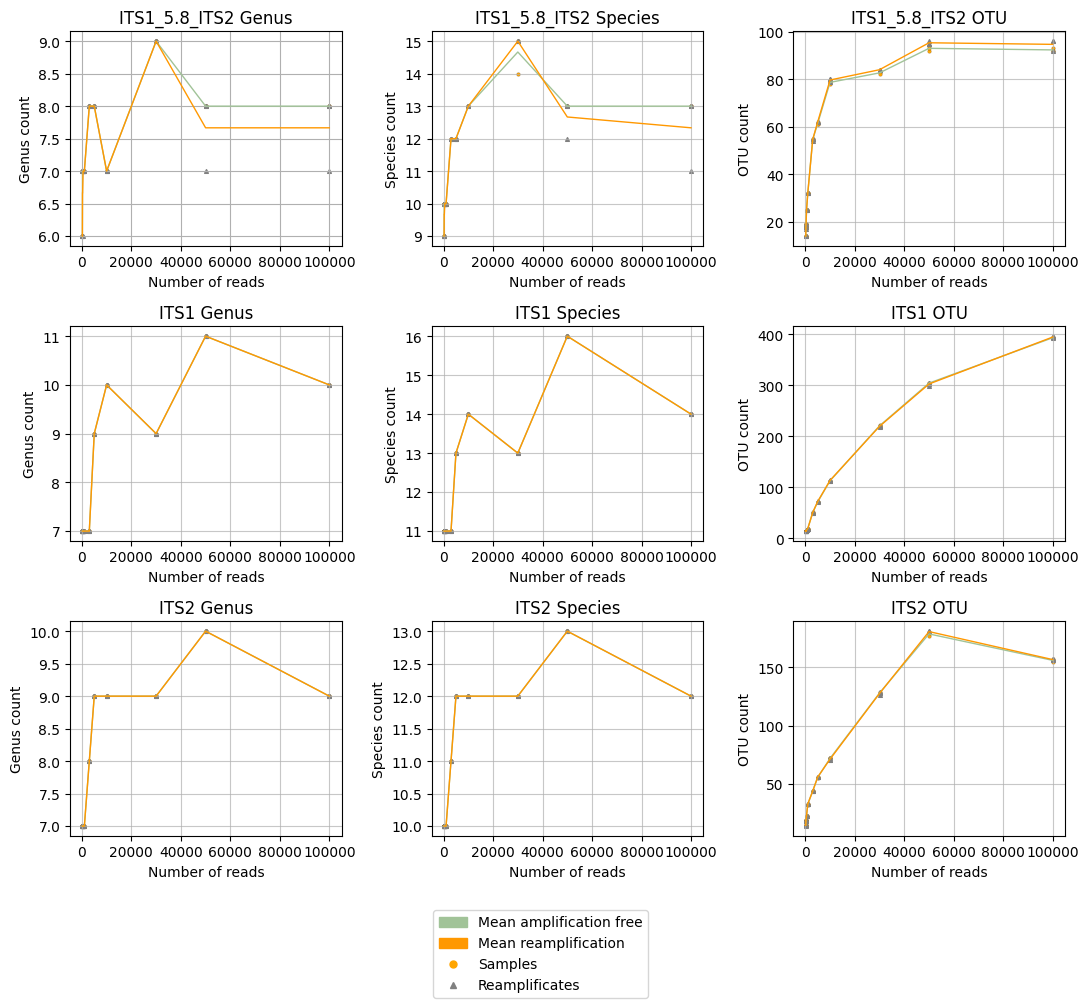

In [4]:
fig, ax = plt.subplots(3,3, figsize=(11,9))
#fig.set_size_inches(14, 11)
# genus
for sample in ITS_full_g_table['sample_name'].unique():
        subset = ITS_full_g_table[ITS_full_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='o', s=7, label=sample, color = 'orange', edgecolor = 'black', linewidth=0.1)
ITS_full_g_table_repl_subset = ITS_full_g_table[ITS_full_g_table['sample_name'].str.contains('R')]
ITS_full_g_table_sample_subset = ITS_full_g_table[~ITS_full_g_table['sample_name'].str.contains('R')]
ITS_full_g_table_mean_repl = ITS_full_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ITS_full_g_table_mean_sample = ITS_full_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[0,0].plot(ITS_full_g_table['number_of_reads'].unique(), ITS_full_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,0].plot(ITS_full_g_table['number_of_reads'].unique(), ITS_full_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,0].set_xlabel('Number of reads')
ax[0,0].set_ylabel('Genus count')
ax[0,0].set_title('ITS1_5.8_ITS2 Genus')
#ax[0,0].set_ylim(-1,31)
#ax[0,0].set_xscale('log')
ax[0,0].grid()
# species
for sample in ITS_full_s_table['sample_name'].unique():
        subset = ITS_full_s_table[ITS_full_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='o', s=7, label=sample, color = 'orange', edgecolor = 'black', linewidth=0.1)
ITS_full_s_table_repl_subset = ITS_full_s_table[ITS_full_s_table['sample_name'].str.contains('R')]
ITS_full_s_table_sample_subset = ITS_full_s_table[~ITS_full_s_table['sample_name'].str.contains('R')]
ITS_full_s_table_mean_repl = ITS_full_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS_full_s_table_mean_sample = ITS_full_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[0,1].plot(ITS_full_s_table['number_of_reads'].unique(), ITS_full_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,1].plot(ITS_full_s_table['number_of_reads'].unique(), ITS_full_s_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,1].set_xlabel('Number of reads')
ax[0,1].set_ylabel('Species count')
ax[0,1].set_title('ITS1_5.8_ITS2 Species')
#ax[0,1].set_ylim(-1,31)
#ax[0,1].set_xscale('log')
ax[0,1].grid(alpha=0.7)
#otu
for sample in ITS_full_otu_table['sample_name'].unique():
        subset = ITS_full_otu_table[ITS_full_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='^',s=7, label=sample, color ='gray')
        else:
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='o', s=7, label=sample, color ='orange',edgecolor = 'black', linewidth=0.1)
ITS_full_otu_table_repl_subset = ITS_full_otu_table[ITS_full_otu_table['sample_name'].str.contains('R')]
ITS_full_otu_table_sample_subset = ITS_full_otu_table[~ITS_full_otu_table['sample_name'].str.contains('R')]
ITS_full_otu_table_mean_repl = ITS_full_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS_full_otu_table_mean_sample = ITS_full_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[0,2].plot(ITS_full_otu_table['number_of_reads'].unique(), ITS_full_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,2].plot(ITS_full_otu_table['number_of_reads'].unique(), ITS_full_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,2].set_xlabel('Number of reads'),
ax[0,2].set_ylabel('OTU count')
ax[0,2].set_title('ITS1_5.8_ITS2 OTU')
#ax[0,2].set_ylim(-1,81)
#ax[0,2].set_xscale('log')
ax[0,2].grid(alpha=0.7)

for sample in ITS1_g_table['sample_name'].unique():
        subset = ITS1_g_table[ITS1_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^',s=7, label=sample, color='gray')
        else:
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS1_g_table_repl_subset = ITS1_g_table[ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_sample_subset = ITS1_g_table[~ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_mean_repl = pd.DataFrame(ITS1_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean())
ITS1_g_table_mean_sample = pd.DataFrame(ITS1_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean())
ax[1,0].plot(ITS1_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,0].plot(ITS1_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,0].set_xlabel('Number of reads')
ax[1,0].set_ylabel('Genus count')
ax[1,0].set_title('ITS1 Genus')
#ax[1,0].set_ylim(-1,31)
#ax[1,0].set_xscale('log')
ax[1,0].grid(alpha=0.7)

for sample in ITS1_s_table['sample_name'].unique():
        subset = ITS1_s_table[ITS1_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS1_s_table_repl_subset = ITS1_s_table[ITS1_s_table['sample_name'].str.contains('R')]
ITS1_s_table_sample_subset = ITS1_s_table[~ITS1_s_table['sample_name'].str.contains('R')]
ITS1_s_table_mean_repl = ITS1_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS1_s_table_mean_sample = ITS1_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[1,1].plot(ITS1_s_table['number_of_reads'].unique(), ITS1_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,1].plot(ITS1_s_table['number_of_reads'].unique(), ITS1_s_table_mean_repl, linestyle= '-',linewidth=1, color ='#FF9800')
ax[1,1].set_xlabel('Number of reads')
ax[1,1].set_ylabel('Species count')
ax[1,1].set_title('ITS1 Species')
#ax[1,1].set_ylim(-1,31)
#ax[1,1].set_xscale('log')
ax[1,1].grid(alpha=0.7)

for sample in ITS1_otu_table ['sample_name'].unique():
        subset = ITS1_otu_table [ITS1_otu_table ['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^',s=7, label=sample, color = 'gray')
        else:
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange',edgecolor = 'black', linewidth=0.1)
ITS1_otu_table_repl_subset = ITS1_otu_table[ITS1_otu_table['sample_name'].str.contains('R')]
ITS1_otu_table_sample_subset = ITS1_otu_table[~ITS1_otu_table['sample_name'].str.contains('R')]
ITS1_otu_table_mean_repl = ITS1_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS1_otu_table_mean_sample = ITS1_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[1,2].plot(ITS1_otu_table['number_of_reads'].unique(), ITS1_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,2].plot(ITS1_otu_table['number_of_reads'].unique(), ITS1_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,2].set_xlabel('Number of reads')
ax[1,2].set_ylabel('OTU count')
ax[1,2].set_title('ITS1 OTU')
#ax[1,2].set_ylim(-1,141)
#ax[1,2].set_xscale('log')
ax[1,2].grid(alpha=0.7)

for sample in ITS2_g_table['sample_name'].unique():
        subset = ITS2_g_table[ITS2_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[2,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[2,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS2_g_table_repl_subset = ITS2_g_table[ITS2_g_table['sample_name'].str.contains('R')]
ITS2_g_table_sample_subset = ITS2_g_table[~ITS2_g_table['sample_name'].str.contains('R')]
ITS2_g_table_mean_repl = ITS2_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ITS2_g_table_mean_sample = ITS2_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[2,0].plot(ITS2_g_table['number_of_reads'].unique(), ITS2_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,0].plot(ITS2_g_table['number_of_reads'].unique(), ITS2_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,0].set_xlabel('Number of reads')
ax[2,0].set_ylabel('Genus count')
ax[2,0].set_title('ITS2 Genus')
#ax[2,0].set_ylim(-1,31)
#ax[2,0].set_xscale('log')
ax[2,0].grid(alpha=0.7)

for sample in ITS2_s_table['sample_name'].unique():
        subset = ITS2_s_table[ITS2_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[2,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[2,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS2_s_table_repl_subset = ITS2_s_table[ITS2_s_table['sample_name'].str.contains('R')]
ITS2_s_table_sample_subset = ITS2_s_table[~ITS2_s_table['sample_name'].str.contains('R')]
ITS2_s_table_mean_repl = ITS2_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS2_s_table_mean_sample = ITS2_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[2,1].plot(ITS2_s_table['number_of_reads'].unique(), ITS2_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,1].plot(ITS2_s_table['number_of_reads'].unique(), ITS2_s_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,1].set_xlabel('Number of reads')
ax[2,1].set_ylabel('Species count')
ax[2,1].set_title('ITS2 Species')
#ax[2,1].set_ylim(-1,31)
#ax[2,1].set_xscale('log')
ax[2,1].grid(alpha=0.7)

for sample in ITS2_otu_table ['sample_name'].unique():
        subset = ITS2_otu_table [ITS2_otu_table ['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):#FF9800
            ax[2,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[2,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange',edgecolor = 'black', linewidth=0.1)
ITS2_otu_table_repl_subset = ITS2_otu_table[ITS2_otu_table['sample_name'].str.contains('R')]
ITS2_otu_table_sample_subset = ITS2_otu_table[~ITS2_otu_table['sample_name'].str.contains('R')]
ITS2_otu_table_mean_repl = ITS2_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS2_otu_table_mean_sample = ITS2_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[2,2].plot(ITS2_otu_table['number_of_reads'].unique(), ITS2_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,2].plot(ITS2_otu_table['number_of_reads'].unique(), ITS2_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,2].set_xlabel('Number of reads')
ax[2,2].set_ylabel('OTU count')
ax[2,2].set_title('ITS2 OTU')
#ax[2,2].set_ylim(-1,141)
#ax[2,2].set_xscale('log')
ax[2,2].grid(alpha=0.7)

legend = mpatches.Patch(color='#A1C398', label='Mean amplification free')
legend2 = mpatches.Patch(color='#FF9800', label='Mean reamplification')
lines_sample = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize = 5, label='Samples')
lines_repl = mlines.Line2D([], [], color='gray', marker='^', linestyle='None', markersize = 5, label='Reamplificates')
plt.tight_layout()
fig.legend(handles=[legend, legend2,lines_sample,lines_repl], bbox_to_anchor=(0.6, -0.01))
fig.show()
fig.savefig("ITS_refraction_nolog_POOL_new_db.pdf",format="pdf", bbox_inches="tight")
fig.savefig("ITS_refraction_nolog_POOL_new_db.png", dpi=800, format="png", bbox_inches='tight')
#fig.savefig("ITS_refraction_nolog_SINGLE_new_db.pdf",format="pdf", bbox_inches="tight")
#fig.savefig("ITS_refraction_nolog_SINGLE_new_db.png", dpi=800, format="png", bbox_inches='tight')

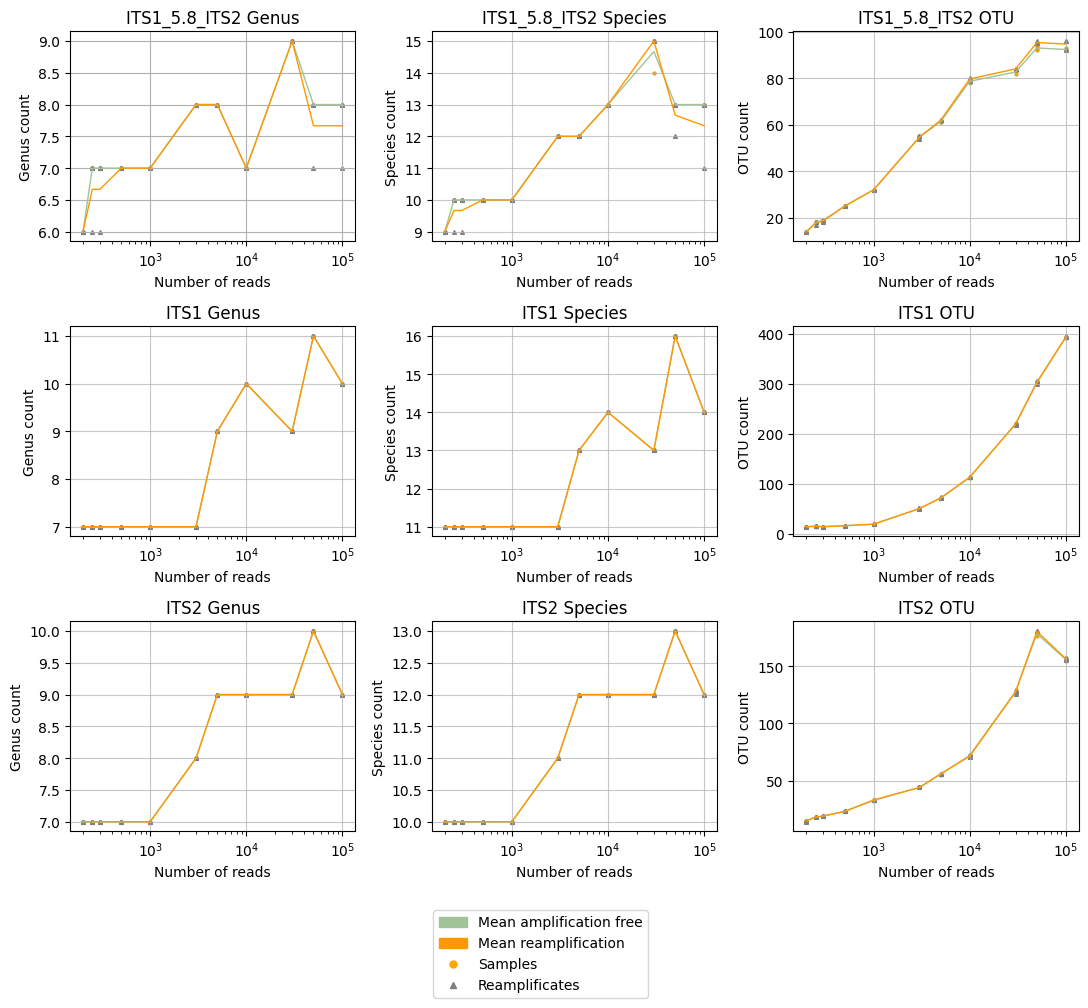

In [6]:
fig, ax = plt.subplots(3,3, figsize=(11,9))
#fig.set_size_inches(14, 11)
# genus
for sample in ITS_full_g_table['sample_name'].unique():
        subset = ITS_full_g_table[ITS_full_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'], marker='o', s=7, label=sample, color = 'orange', edgecolor = 'black', linewidth=0.1)
ITS_full_g_table_repl_subset = ITS_full_g_table[ITS_full_g_table['sample_name'].str.contains('R')]
ITS_full_g_table_sample_subset = ITS_full_g_table[~ITS_full_g_table['sample_name'].str.contains('R')]
ITS_full_g_table_mean_repl = ITS_full_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ITS_full_g_table_mean_sample = ITS_full_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[0,0].plot(ITS_full_g_table['number_of_reads'].unique(), ITS_full_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,0].plot(ITS_full_g_table['number_of_reads'].unique(), ITS_full_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,0].set_xlabel('Number of reads')
ax[0,0].set_ylabel('Genus count')
ax[0,0].set_title('ITS1_5.8_ITS2 Genus')
#ax[0,0].set_ylim(-1,31)
ax[0,0].set_xscale('log')
ax[0,0].grid()
# species
for sample in ITS_full_s_table['sample_name'].unique():
        subset = ITS_full_s_table[ITS_full_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[0,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'], marker='o', s=7, label=sample, color = 'orange', edgecolor = 'black', linewidth=0.1)
ITS_full_s_table_repl_subset = ITS_full_s_table[ITS_full_s_table['sample_name'].str.contains('R')]
ITS_full_s_table_sample_subset = ITS_full_s_table[~ITS_full_s_table['sample_name'].str.contains('R')]
ITS_full_s_table_mean_repl = ITS_full_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS_full_s_table_mean_sample = ITS_full_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[0,1].plot(ITS_full_s_table['number_of_reads'].unique(), ITS_full_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,1].plot(ITS_full_s_table['number_of_reads'].unique(), ITS_full_s_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,1].set_xlabel('Number of reads')
ax[0,1].set_ylabel('Species count')
ax[0,1].set_title('ITS1_5.8_ITS2 Species')
#ax[0,1].set_ylim(-1,31)
ax[0,1].set_xscale('log')
ax[0,1].grid(alpha=0.7)
#otu
for sample in ITS_full_otu_table['sample_name'].unique():
        subset = ITS_full_otu_table[ITS_full_otu_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='^',s=7, label=sample, color ='gray')
        else:
            ax[0,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'], marker='o', s=7, label=sample, color ='orange',edgecolor = 'black', linewidth=0.1)
ITS_full_otu_table_repl_subset = ITS_full_otu_table[ITS_full_otu_table['sample_name'].str.contains('R')]
ITS_full_otu_table_sample_subset = ITS_full_otu_table[~ITS_full_otu_table['sample_name'].str.contains('R')]
ITS_full_otu_table_mean_repl = ITS_full_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS_full_otu_table_mean_sample = ITS_full_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[0,2].plot(ITS_full_otu_table['number_of_reads'].unique(), ITS_full_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[0,2].plot(ITS_full_otu_table['number_of_reads'].unique(), ITS_full_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[0,2].set_xlabel('Number of reads'),
ax[0,2].set_ylabel('OTU count')
ax[0,2].set_title('ITS1_5.8_ITS2 OTU')
#ax[0,2].set_ylim(-1,81)
ax[0,2].set_xscale('log')
ax[0,2].grid(alpha=0.7)

for sample in ITS1_g_table['sample_name'].unique():
        subset = ITS1_g_table[ITS1_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^',s=7, label=sample, color='gray')
        else:
            ax[1,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS1_g_table_repl_subset = ITS1_g_table[ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_sample_subset = ITS1_g_table[~ITS1_g_table['sample_name'].str.contains('R')]
ITS1_g_table_mean_repl = pd.DataFrame(ITS1_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean())
ITS1_g_table_mean_sample = pd.DataFrame(ITS1_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean())
ax[1,0].plot(ITS1_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,0].plot(ITS1_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,0].set_xlabel('Number of reads')
ax[1,0].set_ylabel('Genus count')
ax[1,0].set_title('ITS1 Genus')
#ax[1,0].set_ylim(-1,31)
ax[1,0].set_xscale('log')
ax[1,0].grid(alpha=0.7)

for sample in ITS1_s_table['sample_name'].unique():
        subset = ITS1_s_table[ITS1_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[1,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS1_s_table_repl_subset = ITS1_s_table[ITS1_s_table['sample_name'].str.contains('R')]
ITS1_s_table_sample_subset = ITS1_s_table[~ITS1_s_table['sample_name'].str.contains('R')]
ITS1_s_table_mean_repl = ITS1_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS1_s_table_mean_sample = ITS1_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[1,1].plot(ITS1_s_table['number_of_reads'].unique(), ITS1_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,1].plot(ITS1_s_table['number_of_reads'].unique(), ITS1_s_table_mean_repl, linestyle= '-',linewidth=1, color ='#FF9800')
ax[1,1].set_xlabel('Number of reads')
ax[1,1].set_ylabel('Species count')
ax[1,1].set_title('ITS1 Species')
#ax[1,1].set_ylim(-1,31)
ax[1,1].set_xscale('log')
ax[1,1].grid(alpha=0.7)

for sample in ITS1_otu_table ['sample_name'].unique():
        subset = ITS1_otu_table [ITS1_otu_table ['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^',s=7, label=sample, color = 'gray')
        else:
            ax[1,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange',edgecolor = 'black', linewidth=0.1)
ITS1_otu_table_repl_subset = ITS1_otu_table[ITS1_otu_table['sample_name'].str.contains('R')]
ITS1_otu_table_sample_subset = ITS1_otu_table[~ITS1_otu_table['sample_name'].str.contains('R')]
ITS1_otu_table_mean_repl = ITS1_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS1_otu_table_mean_sample = ITS1_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[1,2].plot(ITS1_otu_table['number_of_reads'].unique(), ITS1_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[1,2].plot(ITS1_otu_table['number_of_reads'].unique(), ITS1_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[1,2].set_xlabel('Number of reads')
ax[1,2].set_ylabel('OTU count')
ax[1,2].set_title('ITS1 OTU')
#ax[1,2].set_ylim(-1,141)
ax[1,2].set_xscale('log')
ax[1,2].grid(alpha=0.7)

for sample in ITS2_g_table['sample_name'].unique():
        subset = ITS2_g_table[ITS2_g_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[2,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[2,0].scatter(subset['number_of_reads'], subset['Genus_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS2_g_table_repl_subset = ITS2_g_table[ITS2_g_table['sample_name'].str.contains('R')]
ITS2_g_table_sample_subset = ITS2_g_table[~ITS2_g_table['sample_name'].str.contains('R')]
ITS2_g_table_mean_repl = ITS2_g_table_repl_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ITS2_g_table_mean_sample = ITS2_g_table_sample_subset.groupby('number_of_reads')['Genus_count_nonzero'].mean()
ax[2,0].plot(ITS2_g_table['number_of_reads'].unique(), ITS2_g_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,0].plot(ITS2_g_table['number_of_reads'].unique(), ITS2_g_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,0].set_xlabel('Number of reads')
ax[2,0].set_ylabel('Genus count')
ax[2,0].set_title('ITS2 Genus')
#ax[2,0].set_ylim(-1,31)
ax[2,0].set_xscale('log')
ax[2,0].grid(alpha=0.7)

for sample in ITS2_s_table['sample_name'].unique():
        subset = ITS2_s_table[ITS2_s_table['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):
            ax[2,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='^', s=7, label=sample, color='gray')
        else:
            ax[2,1].scatter(subset['number_of_reads'], subset['Species_count_nonzero'],marker='o', s=7, label=sample, color='orange',edgecolor = 'black', linewidth=0.1)
ITS2_s_table_repl_subset = ITS2_s_table[ITS2_s_table['sample_name'].str.contains('R')]
ITS2_s_table_sample_subset = ITS2_s_table[~ITS2_s_table['sample_name'].str.contains('R')]
ITS2_s_table_mean_repl = ITS2_s_table_repl_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ITS2_s_table_mean_sample = ITS2_s_table_sample_subset.groupby('number_of_reads')['Species_count_nonzero'].mean()
ax[2,1].plot(ITS2_s_table['number_of_reads'].unique(), ITS2_s_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,1].plot(ITS2_s_table['number_of_reads'].unique(), ITS2_s_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,1].set_xlabel('Number of reads')
ax[2,1].set_ylabel('Species count')
ax[2,1].set_title('ITS2 Species')
#ax[2,1].set_ylim(-1,31)
ax[2,1].set_xscale('log')
ax[2,1].grid(alpha=0.7)

for sample in ITS2_otu_table ['sample_name'].unique():
        subset = ITS2_otu_table [ITS2_otu_table ['sample_name'] == sample]
        if 'R' in str(subset['sample_name']):#FF9800
            ax[2,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='^', s=7, label=sample, color = 'gray')
        else:
            ax[2,2].scatter(subset['number_of_reads'], subset['OTU_count_nonzero'],marker='o', s=7, label=sample, color = 'orange',edgecolor = 'black', linewidth=0.1)
ITS2_otu_table_repl_subset = ITS2_otu_table[ITS2_otu_table['sample_name'].str.contains('R')]
ITS2_otu_table_sample_subset = ITS2_otu_table[~ITS2_otu_table['sample_name'].str.contains('R')]
ITS2_otu_table_mean_repl = ITS2_otu_table_repl_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ITS2_otu_table_mean_sample = ITS2_otu_table_sample_subset.groupby('number_of_reads')['OTU_count_nonzero'].mean()
ax[2,2].plot(ITS2_otu_table['number_of_reads'].unique(), ITS2_otu_table_mean_sample, linestyle= '-',linewidth=1, color = '#A1C398')
ax[2,2].plot(ITS2_otu_table['number_of_reads'].unique(), ITS2_otu_table_mean_repl, linestyle= '-',linewidth=1, color = '#FF9800')
ax[2,2].set_xlabel('Number of reads')
ax[2,2].set_ylabel('OTU count')
ax[2,2].set_title('ITS2 OTU')
#ax[2,2].set_ylim(-1,141)
ax[2,2].set_xscale('log')
ax[2,2].grid(alpha=0.7)

legend = mpatches.Patch(color='#A1C398', label='Mean amplification free')
legend2 = mpatches.Patch(color='#FF9800', label='Mean reamplification')
lines_sample = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize = 5, label='Samples')
lines_repl = mlines.Line2D([], [], color='gray', marker='^', linestyle='None', markersize = 5, label='Reamplificates')
plt.tight_layout()
fig.legend(handles=[legend, legend2,lines_sample,lines_repl], bbox_to_anchor=(0.6, -0.01))
fig.show()
fig.savefig("ITS_refraction_log_POOL_new_db.pdf",format="pdf", bbox_inches="tight")
fig.savefig("ITS_refraction_log_POOL_new_db.png", dpi=800, format="png", bbox_inches='tight')
#fig.savefig("ITS_refraction_log_SINGLE_new_db.pdf",format="pdf", bbox_inches="tight")
#fig.savefig("ITS_refraction_log_SINGLE_new_db.png", dpi=800, format="png", bbox_inches='tight')